In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("country_wise_latest.csv")
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [3]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
data.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [5]:
top_countries = data.sort_values(by='Confirmed', ascending=False).head(20)

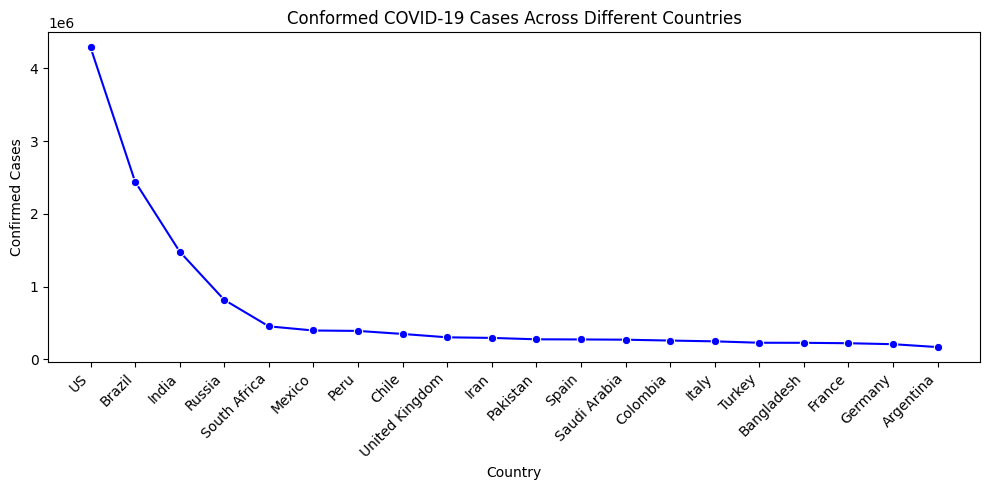

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data=top_countries, x='Country/Region', y='Confirmed', marker='o', color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Conformed COVID-19 Cases Across Different Countries')
plt.ylabel('Confirmed Cases')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

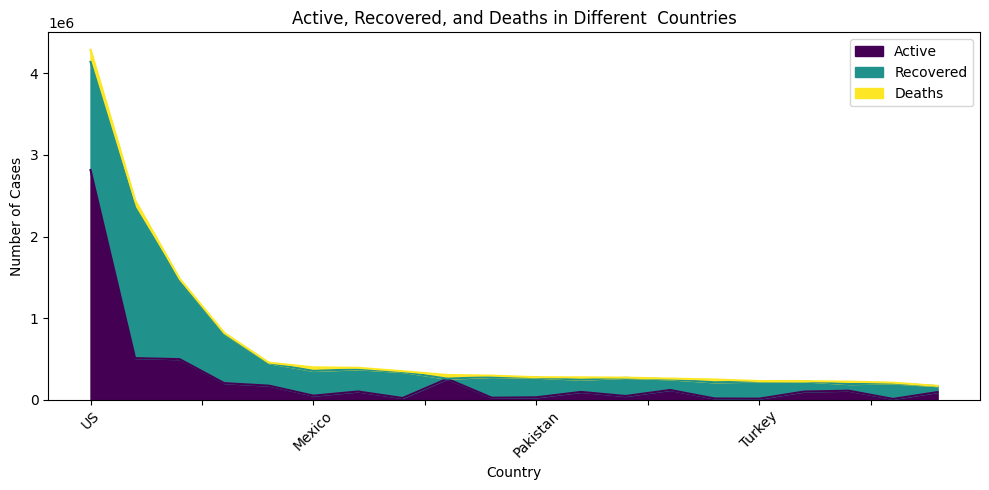

In [7]:
plt.figure(figsize=(10,5))
top_countries_plot = top_countries[['Country/Region', 'Active', 'Recovered', 'Deaths']].set_index('Country/Region')
top_countries_plot.plot(kind='area', stacked=True, figsize=(10,5), cmap='viridis')
plt.title('Active, Recovered, and Deaths in Different  Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

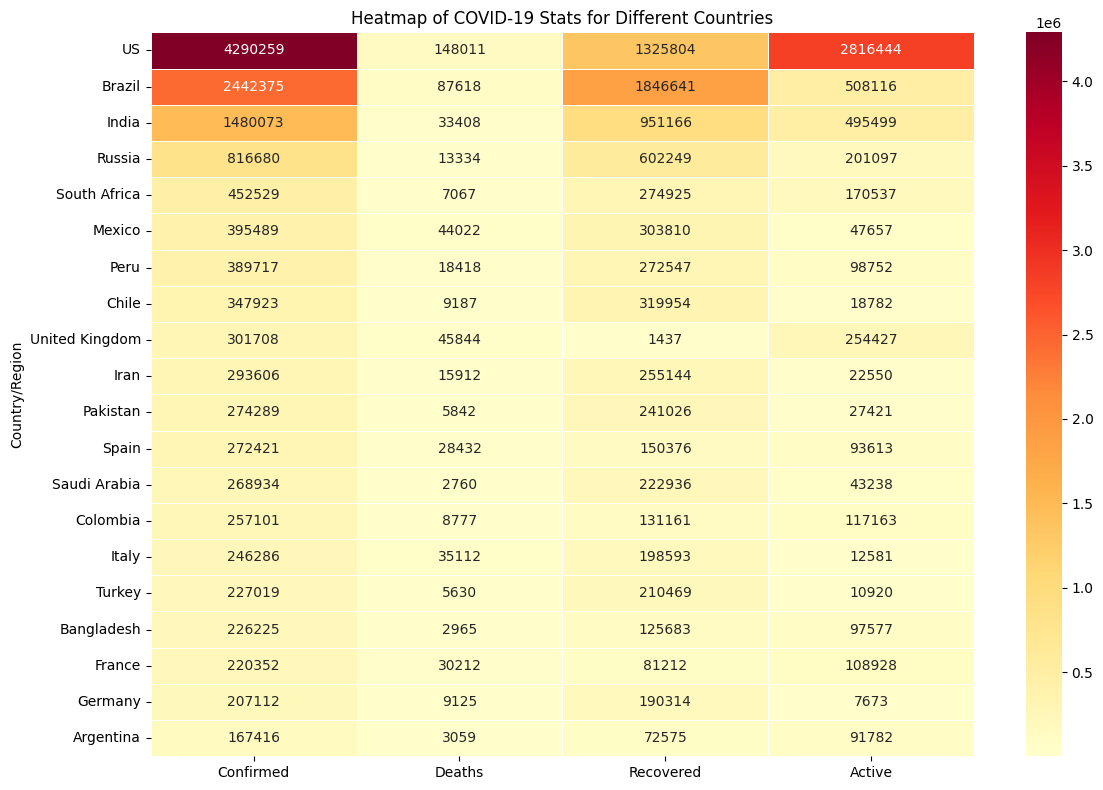

In [8]:
pivot = top_countries[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']].set_index('Country/Region')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of COVID-19 Stats for Different Countries')
plt.tight_layout()
plt.show()

Pandemic Growth

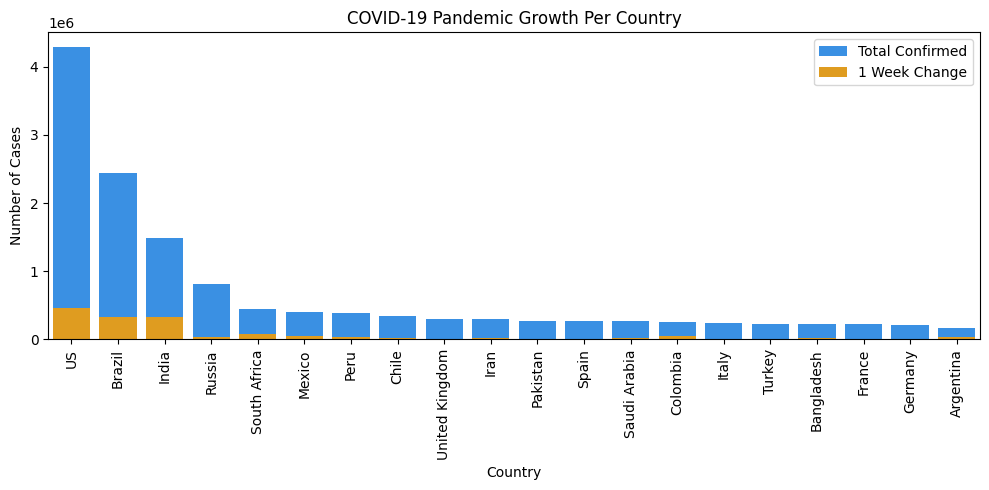

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x='Country/Region', y='Confirmed', color='dodgerblue', label='Total Confirmed')
sns.barplot(data=top_countries, x='Country/Region', y='1 week change', color='orange', label='1 Week Change')
plt.title('COVID-19 Pandemic Growth Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

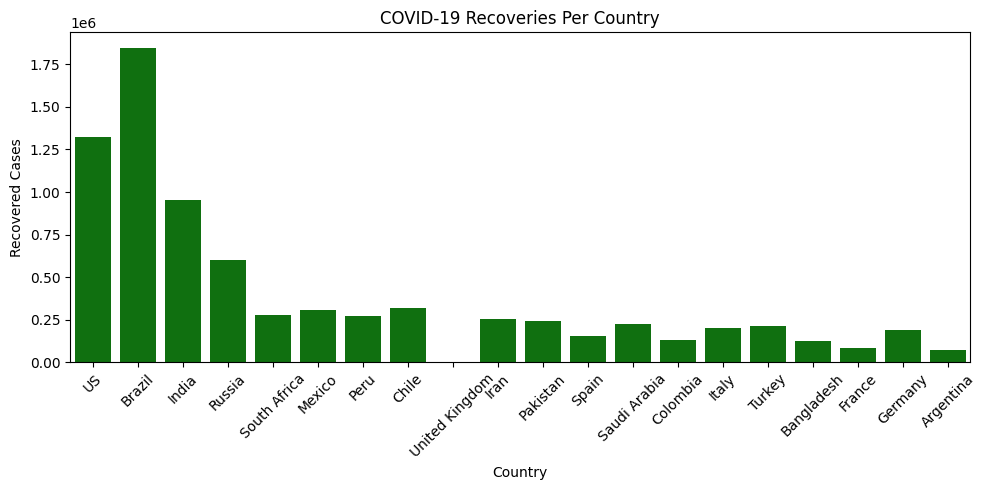

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x='Country/Region', y='Recovered', color='green')
plt.title('COVID-19 Recoveries Per Country')
plt.xlabel('Country')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

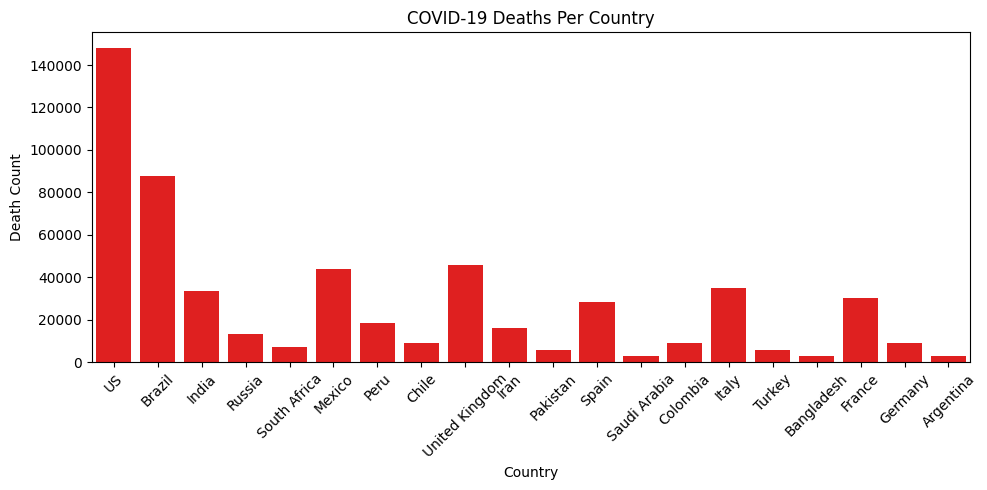

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x='Country/Region', y='Deaths', color='red')
plt.title('COVID-19 Deaths Per Country')
plt.xlabel('Country')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

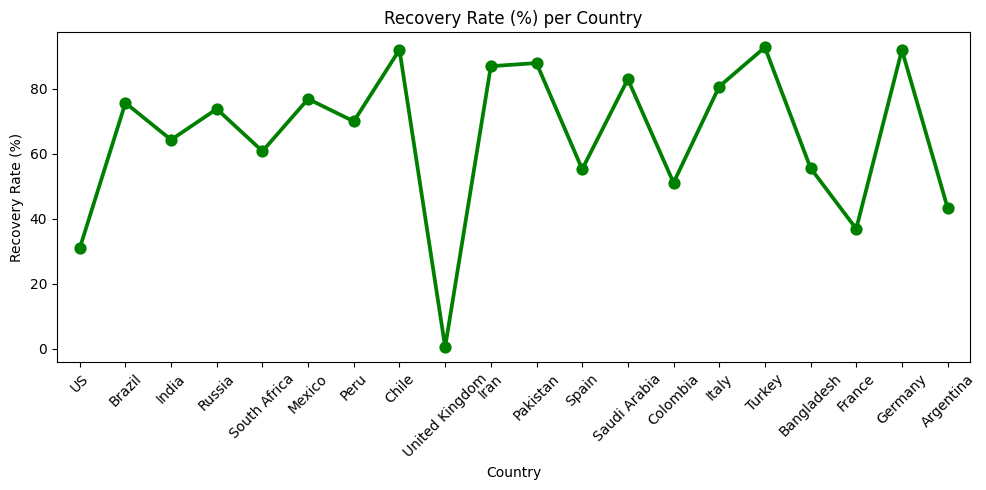

In [12]:
plt.figure(figsize=(10,5))
sns.pointplot(data=top_countries, x='Country/Region', y='Recovered / 100 Cases', color='green')
plt.title('Recovery Rate (%) per Country')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

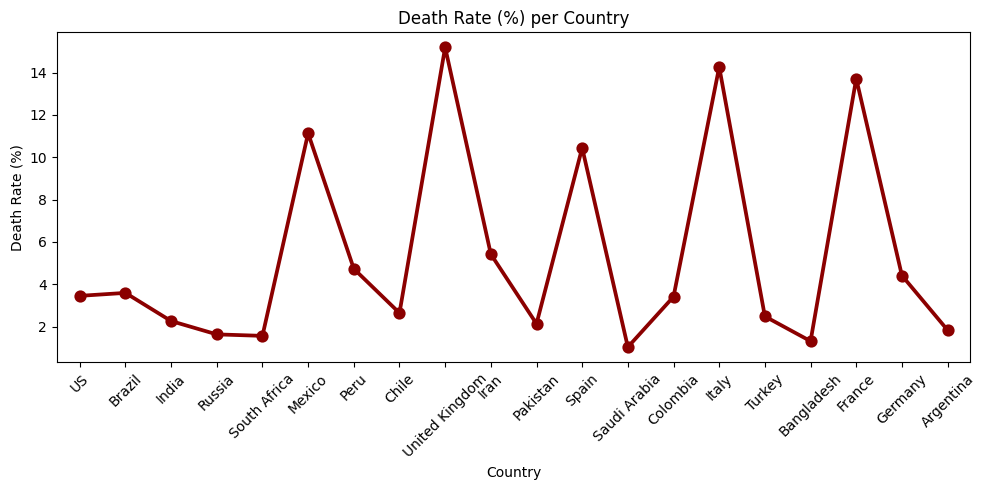

In [13]:
plt.figure(figsize=(10,5))
sns.pointplot(data=top_countries, x='Country/Region', y='Deaths / 100 Cases', color='darkred')
plt.title('Death Rate (%) per Country')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()